In [3]:
# https://juliadatacubes.github.io/YAXArrays.jl/dev/examples/generated/UserGuide/examples_from_esdl_study_3/
using Zarr, YAXArrays, NetCDF, DiskArrays
using DimensionalData
using EarthDataLab

Base.names(ds::Dataset) = string.(collect(keys(ds.cubes)))
Base.getindex(ds::Dataset, i) = ds[names(ds)[i]]
chunksize(cube) = Cubes.cubechunks(cube)

[ Info: Precompiling EarthDataLab [359177bc-a543-11e8-11b7-bb015dba3358]


In [4]:
cube_handle = esdc(res="tiny")

144×72×989×42 YAXArray{Union{Missing, Float32},4} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points,
  Dim{:Variable} Categorical{String} String[sensible_heat, potential_evaporation, …, net_ecosystem_exchange, snow_sublimation] Unordered
units: mm d^-1
Total size: 1.6 GB


# 1. 保存数据

In [5]:
cube_handle.axes

Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points,
Dim{:Variable} Categorical{String} String[sensible_heat, potential_evaporation, …, net_ecosystem_exchange, snow_sublimation] Unordered

In [ ]:
cube_handle.Variable

In [21]:
# how to if want multi-vars
vars = ["air_temperature_2m", "terrestrial_ecosystem_respiration"]
cube = cube_handle[Variable = At(vars)]

f = "datacube-01"
@time savecube(cube, f, driver=:zarr) # YAXArray

Progress: 100%|█████████████████████████████████████████| Time: 0:00:31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:16


 67.416037 seconds (32.39 M allocations: 2.546 GiB, 18.21% gc time, 34.55% compilation time: <1% of which was recompilation)

144×72×989×2 YAXArray{Union{Missing, Float32},4} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points,
  Dim{:Variable} Categorical{String} String["air_temperature_2m", "terrestrial_ecosystem_respiration"] ForwardOrdered
units: mm d^-1
Total size: 78.23 MB


# 2. 数据分析

In [31]:
## 重新把数据读进去来
p = "./datacube-01"
ds = open_dataset(p)

YAXArray Dataset
Shared Axes: 
Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points
Variables: 
air_temperature_2m, terrestrial_ecosystem_respiration, 
Properties: Dict{String, Any}("_CubePerm" => Any[1, 2, 3, 4])


In [29]:
world_tair = ds[Variables = At("air_temperature_2m")]

YAXArray Dataset
Shared Axes: 
Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points
Variables: 
air_temperature_2m, terrestrial_ecosystem_respiration, 
Properties: Dict{String, Any}("_CubePerm" => Any[1, 2, 3, 4])


In [36]:
ds["air_temperature_2m"] # 这里与Terra的使用方法比较类似

144×72×989 YAXArray{Union{Missing, Float32},3} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points
name: air_temperature_2m
units: mm d^-1
Total size: 39.12 MB


In [63]:
# how to get axis variable name
# propertynames(ds)

names(ds)
# [1] # variable names

2-element Vector{String}:
 "air_temperature_2m"
 "terrestrial_ecosystem_respiration"

In [38]:
using Ipaper

A = zeros(Float32, 144, 72, 989);
obj_size(A)
# methods()

[ Info: Precompiling Ipaper [e58298cb-69f7-4186-aecd-5834b6793426]
[ Info: Precompiling CategoricalArraysRecipesBaseExt [b7a5aa15-52bc-53b2-90b5-730883a6b80e]
[ Info: Precompiling CategoricalArraysJSONExt [3659b7b4-73bc-5a91-ba4f-cc4948098fdb]
[ Info: Precompiling IpaperSlopeExt [3187b56e-9583-5004-b811-c64661423187]


Array{Float32, 3} | (144, 72, 989) | 39.12 Mb


In [70]:
# size(world_tair)
ra_tair = ds[1]
ra_resp = ds[2]

144×72×989 YAXArray{Union{Missing, Float32},3} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points
name: terrestrial_ecosystem_respiration
units: mm d^-1
Total size: 39.12 MB


## 2.1 读取数据

In [78]:
## 保存数据
inds = findall(i-> !ismissing(i), ra_tair[:,:,:])
span_starts = first(inds)

axtime = collect(ds.Time);
println("Data span of `air_temperature_2m` starts on ", axtime[span_starts[3]])

Data span of `air_temperature_2m` starts on 1979-01-09T00:00:00


In [77]:
span_starts = first(findall(i-> !ismissing(i), ra_resp[:,:,:]))
# axtime = collect(cube_handle.axes[3]);
println("Data span of `terrestrial_ecosystem_respiration` starts on ", axtime[span_starts[3]])

Data span of `terrestrial_ecosystem_respiration` starts on 2001-01-09T00:00:00


In [81]:
ra_tair

144×72×989 YAXArray{Union{Missing, Float32},3} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points
name: air_temperature_2m
units: mm d^-1
Total size: 39.12 MB


In [84]:
world_tair = ra_tair[time=2001:2015]
world_resp = ra_resp[time=2001:2015]

144×72×345 YAXArray{Union{Missing, Float32},3} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[2001-01-09T00:00:00, …, 2015-12-27T00:00:00] ForwardOrdered Irregular Points
name: terrestrial_ecosystem_respiration
units: mm d^-1
Total size: 13.65 MB


## 2.2 处理数据

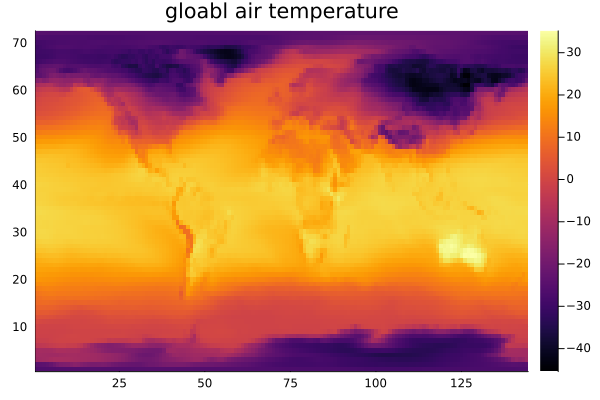

In [94]:
using Plots

r = world_tair[:, :, 1]
# r.data
heatmap(r.data', title = "gloabl air temperature")
# plot(r)

In [95]:
world_τ = map(tair -> (tair - Float32(273.15+15))/10, world_tair)
world_ρ = map(log, world_resp)


144×72×345 YAXArray{Union{Missing, Float32},3} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[2001-01-09T00:00:00, …, 2015-12-27T00:00:00] ForwardOrdered Irregular Points
name: terrestrial_ecosystem_respiration
units: mm d^-1
Total size: 13.65 MB


In [96]:
world_new = concatenatecubes([world_τ, world_ρ], Dim{:Variable}(["τ","ρ"]))


144×72×345×2 YAXArray{Union{Missing, Float32},4} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[2001-01-09T00:00:00, …, 2015-12-27T00:00:00] ForwardOrdered Irregular Points,
  Dim{:Variable} Categorical{String} String["τ", "ρ"] ReverseOrdered
units: mm d^-1
name: terrestrial_ecosystem_respiration
Total size: 27.29 MB


### 2.2.1 滑动平均

In [97]:
indims  = InDims("Time")

InDims((YAXArrays.ByName("Time"),), Array, (YAXArrays.DAT.AllMissing(),), missing)

In [101]:
outdims = OutDims("Time", Dim{:Scale}(["Slow","Fast"]))

OutDims((YAXArrays.ByName("Time"), YAXArrays.ByValue(Dim{:Scale, Vector{String}}(["Slow", "Fast"]))), :auto, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}(), false, Array, :input, 1)

In [105]:
function movingAverage(xout, xin; windowsize = 4)
    n = length(xin)
    # calculate moving average over window
    # truncating windows for data points at beginning and end
    movAv = map(1:n) do i
        inds = max(1,i-windowsize):min(i+windowsize,n)
        mean(view(xin, inds))
    end
    # return slow oscillations in col 1 and fast oscillations in col 2
    xout[:,1] .= movAv
    xout[:,2] .= xin .- movAv    
    return xout
end

movingAverage (generic function with 1 method)

In [106]:
# here we define the input and output dimensions for the decomposition
indims  = InDims("Time")
outdims = OutDims("Time", Dim{:Scale}(["Slow","Fast"]))

# 时间改到前面去了
@time cube_decomp = mapCube(movingAverage, world_new; indims, outdims)

  2.964841 seconds (28.14 M allocations: 1.008 GiB, 18.85% gc time, 5.86% compilation time)


345×2×144×72×2 YAXArray{Union{Missing, Float32},5} with dimensions: 
  Ti Sampled{DateTime} DateTime[2001-01-09T00:00:00, …, 2015-12-27T00:00:00] ForwardOrdered Irregular Points,
  Dim{:Scale} Categorical{String} String["Slow", "Fast"] ReverseOrdered,
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Dim{:Variable} Categorical{String} String["τ", "ρ"] ReverseOrdered
Total size: 54.58 MB


### 2.2.2 estimating the temperature sensitivities

In [109]:
world_new

144×72×345×2 YAXArray{Union{Missing, Float32},4} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[2001-01-09T00:00:00, …, 2015-12-27T00:00:00] ForwardOrdered Irregular Points,
  Dim{:Variable} Categorical{String} String["τ", "ρ"] ReverseOrdered
units: mm d^-1
name: terrestrial_ecosystem_respiration
Total size: 27.29 MB


In [122]:
# The classical $Q_{10}$ estimation could be realized with the following function
## 基础的AbstractArray的类型
function Q10direct(xout_Q10, xout_rb, xin)
    # @show typeof(xout_Q10), typeof(xout_rb), typeof(xout_rb)
    # @error("stop here!")
    τ, ρ = eachcol(xin)
    # solve the regression
    b    = cor(τ, ρ)*std(ρ)/std(τ) # slope
    a    = mean(ρ) - b*mean(τ) # 这个是时间序列

    Q10  = exp(b)
    Rb   = exp(a)
    # the returned Rb is a constant time series
    xout_rb .= Rb
    xout_Q10 .= Q10
end

Q10direct (generic function with 1 method)

In [128]:
using Statistics

indims_q10 = InDims("Time","Var")

outdims_q10 = OutDims() ## Just a single number, the first output cube
outdims_rb = OutDims("Time") ## The Rb time series, the second output cube

@time q10_direct, rb_direct = mapCube(Q10direct, world_new, outdims=(outdims_q10, outdims_rb), indims=indims_q10)
display(q10_direct)
display(rb_direct)

  0.648964 seconds (545.49 k allocations: 199.745 MiB, 59.45% gc time)


144×72 YAXArray{Union{Missing, Float32},2} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points
Total size: 40.5 KB


345×144×72 YAXArray{Union{Missing, Float32},3} with dimensions: 
  Ti Sampled{DateTime} DateTime[2001-01-09T00:00:00, …, 2015-12-27T00:00:00] ForwardOrdered Irregular Points,
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points
Total size: 13.65 MB


In [118]:
rb_direct[100, 40, 1:2].data

2-element Vector{Union{Missing, Float32}}:
 missing
 missing

In [129]:
function Q10SCAPE(xout_Q10, xout_rb, xin)
    # xin is now a 3D array with dimensions Time x Scale x Variable
    τ_slow = xin[:, 1, 1]
    τ_fast = xin[:, 2, 1]
    ρ_slow = xin[:, 1, 2]
    ρ_fast = xin[:, 2, 2]
    τ      = τ_slow + τ_fast
    ρ      = ρ_slow + ρ_fast

    # EQ S5
    # Q10 calculated on fast oscillations only
    d    = cor(τ_fast, ρ_fast)*std(ρ_fast)/std(τ_fast)
    c    = mean(ρ_fast) - d*mean(τ_fast)
    Q10  = exp(d)

    # EQ S6: Influence of low frequency temperature on Rb
    ρ_sc = (τ_slow .+ mean(τ)) .* d

    # EQ S7: Time varying estimate for Rb
    ρ_b  = ρ_slow .+ mean(ρ) .- ρ_sc
    Rb_b  = exp.(ρ_b)

    xout_Q10 .= Q10
    xout_rb  .= Rb_b
end


Q10SCAPE (generic function with 1 method)

In [132]:
indims_scape = InDims("Time","Scale","Var")

@time q10_scape, rb_scape = mapCube(Q10SCAPE,cube_decomp, indims=indims_scape, outdims=(outdims_q10, outdims_rb));
q10_scape

  0.874868 seconds (592.60 k allocations: 284.676 MiB, 45.34% gc time)


144×72 YAXArray{Union{Missing, Float32},2} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points
Total size: 40.5 KB


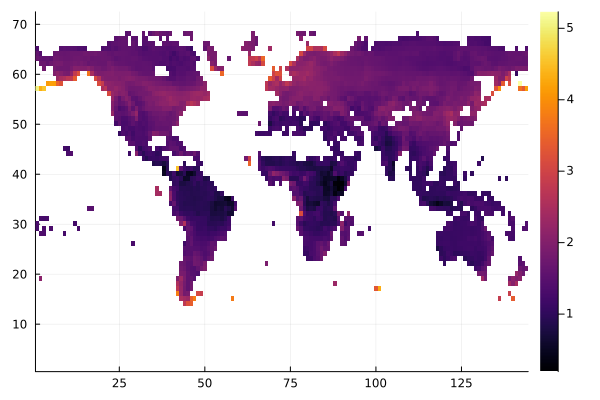

In [133]:
heatmap(q10_scape.data')

In [134]:
ds.axes

Dict{Symbol, DimensionalData.Dimensions.Dimension} with 3 entries:
  :lat  => Dim{:lat, StepRangeLen{Float64, TwicePrecision{Float64}, TwicePrecis…
  :Time => Ti{Vector{DateTime}}([DateTime("1979-01-09T00:00:00"), DateTime("197…
  :lon  => Dim{:lon, StepRangeLen{Float64, TwicePrecision{Float64}, TwicePrecis…

In [138]:
# eachchunk(world_tair)
# chunks在第三维
# DiskArrays.GridChunks(world_tair)

# 3. Chunksize

In [140]:
ds

YAXArray Dataset
Shared Axes: 
Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points
Variables: 
air_temperature_2m, terrestrial_ecosystem_respiration, 
Properties: Dict{String, Any}("_CubePerm" => Any[1, 2, 3, 4])


In [143]:
# ChunkIndices(ds)
const DA = DiskArrays

DiskArrays

In [145]:
# DA.
ds[1].chunks

1×1×22 DiskArrays.GridChunks{3}:
[:, :, 1] =
 (1:144, 1:72, 1:46)

[:, :, 2] =
 (1:144, 1:72, 47:92)

[:, :, 3] =
 (1:144, 1:72, 93:138)

;;; … 

[:, :, 20] =
 (1:144, 1:72, 875:920)

[:, :, 21] =
 (1:144, 1:72, 921:966)

[:, :, 22] =
 (1:144, 1:72, 967:989)

In [146]:
ds

YAXArray Dataset
Shared Axes: 
Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points
Variables: 
air_temperature_2m, terrestrial_ecosystem_respiration, 
Properties: Dict{String, Any}("_CubePerm" => Any[1, 2, 3, 4])


In [158]:
# cube = Cube(ds)
cube

144×72×989×2 YAXArray{Union{Missing, Float32},4} with dimensions: 
  Dim{:lon} Sampled{Float64} -178.75:2.5:178.75 ForwardOrdered Regular Points,
  Dim{:lat} Sampled{Float64} -88.75:2.5:88.75 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime[1979-01-09T00:00:00, …, 2021-12-27T00:00:00] ForwardOrdered Irregular Points,
  Dim{:Variable} Categorical{String} String["air_temperature_2m", "terrestrial_ecosystem_respiration"] ForwardOrdered
units: mm d^-1
Total size: 78.23 MB


In [152]:
typeof(ds)# typeof(cube)

Dataset

In [159]:

chunksize(cube)

(144, 72, 46, 1)

In [184]:
c2 = setchunks(cube, (lon=72, lat=36))
chunksize(c2) # the previous chunks
# c2.chunks

(72, 36, 46, 1)

In [183]:
# chunksize(cube)
# chunksize(c2)


In [178]:
# ?setchunks
methods(setchunks)

# 2 methods for generic function "setchunks" from YAXArrays.Cubes:
 [1] setchunks(c::YAXArray, chunks)
     @ C:\Users\kong\.julia\packages\YAXArrays\ZeGIH\src\Cubes\Cubes.jl:257
 [2] setchunks(ds::Dataset, chunks)
     @ YAXArrays.Datasets C:\Users\kong\.julia\packages\YAXArrays\ZeGIH\src\DatasetAPI\Datasets.jl:500